In [11]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree

In [2]:
combo_df = pd.read_csv('~/capstone_data/skillshare_combined.csv')

In [3]:
combo_df = combo_df.fillna(0.0)

In [4]:
combo_df = combo_df.set_index('user_uid')

In [5]:
y = combo_df['success']
X = combo_df[['payment_provider_cat_codes', 'payment_ux_cat_codes',
       'trial_length_offer_cat_codes', 'sub_utm_channel_cat_codes',
       'sub_utm_source_cat_codes',
       'is_cancel_during_trial', 'day-1', 'day-2', 'day-3', 'day-4', 'day-5',
       'day-6', 'day-7', 'day-8', 'day-9', 'day-10', 'day-11', 'day-12',
       'day-13', 'day-14', 'day-15', 'day-16', 'day-17', 'day-18', 'day-19',
       'day-20', 'day-21', 'day-22', 'day-23', 'day-24', 'day-25', 'day-26',
       'day-27', 'day-28', 'day-29', 'day-30', 'day-31', 'comment_volume',
       'comment_score', 'discussion_volume', 'discussion_score',
       'follow_volume', 'projects_volume', 'projects_score', 'review_volume',
       'rating_avg', 'signup_country_name_cat_codes', 
        'signup_geo_region_cat_codes', 'signup_platform_cat_codes']]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
scaler = StandardScaler().fit(X_train)

In [ ]:
X_scaled = scaler.transform(X_train)

In [ ]:
clf = LogisticRegression().fit(X_scaled, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm, clf.score(X_test, y_test))

In [7]:
from sklearn.tree import DecisionTreeClassifier
dtclf = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)
y_pred = dtclf.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred)
print(cm_dt, dtclf.score(X_test, y_test))

[[71299  1162]
 [19106  3523]] 0.7868545588389947


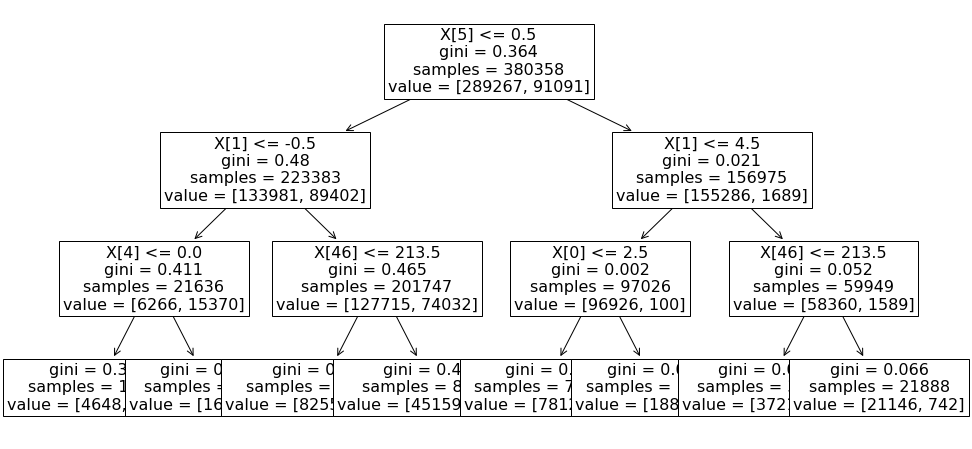

In [18]:
plt.figure(figsize=(16, 8))
tree.plot_tree(dtclf, fontsize=16)
plt.show()